###ANSWER (to make sure this gets removed)

# Grading rubric (41 points)

## Part 1 (4 points)

* 4 points for having added this notebook to the repository and making at least some number of commits

## Part 2 (12 points)
### 2.1 (5 points)
* 1 point for each question

### 2.2 (7 points)
* **Question 2.2.1** (1 point)
* **Question 2.2.2** (3 points)
    * 1 point for adding constants
    * 1 point for applying logistic regression
    * 1 point for printing out the summary table
* **Question 2.2.3** (1 point)
* **Question 2.2.4** (2 points)
    * 1 point for making predictions
    * 1 point for calculating accuracy


## Part 3 (5 points)

* **Question 3.1** (2 points):
    * 1 point for applying perceptron and making prediction
    * 1 point for model evaluation
* **Question 3.2** (3 points):
    * 1 point for applying different penalty terms
    * 1 point for printing out the accuary of each model
    * 1 point for conclusion


## Part 4 (6 points)

* **Question 4.1** (1 point)
* **Question 4.2** (1 point)
* **Question 4.3** (3 points):
    * 1 point for applying PCA
    * 1 point for data transformation
    * 1 point for printing the `explained_variance_ratio_`
* **Question 4.4** (1 point)


    
## Part 5 (14 points)
### 5.1 (6 points)
* **Question 5.1.1** (2 points):
    * 1 point for applying SVC
    * 1 point for model evaluation
* **Question 5.1.2** (3 points):
    * 2 points for applying `GridSearchCV`
    * 1 point for finding the best model
* **Question 5.1.3** (1 point)
    
### 5.2 (8 points)

* **Question 5.2.1** (3 point):
    * 1 point for PCA
    * 1 point for grid-searching and SVC
    * 1 point for the whole function structure
* **Question 5.2.2** (2 points):
    * 1 point for applying the function in **Question 5.2.1**
    * 1 point for saving the results
* **Question 5.2.3** (1 point)
* **Question 5.2.4** (1 point)
* **Question 5.2.5** (1 point)


---

# Homework Assignment #5 (Individual)


### <p style="text-align: right;"> &#9989; Put your name here.</p>
### <p style="text-align: right;"> &#9989; Put your _GitHub username_ here.</p>

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate Logistic Regression models
* Build, fit, and evaluate Perceptron models
* Use PCA to reduce the number of features
* Build, fit, and evaluate an SVC model on PCA-transformed data
* Systematically investigate the effects of the number of PCA components on an SVC model of data

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.


This assignment is **due at 11:59 pm on Monday, November 29th**. It should be uploaded into the "Homework Assignments" submission folder for Homework #5. Submission instructions can be found at the end of the notebook.. 


------
<a id="toc"></a>

## Table of contents

1. [Part 1: Git](#part1) (7 points)

2. [Part 2: Multiple Regression](#part3) (42 points)

3. [Part 3: Logistic Regression](#part4) (25 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [1]:
grades = [7, 42, 25, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 77


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (7 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-05` and copy this notebook in that new directory.

``` bash
# Put the command(s) for creating the new directory

```


&#9989; **Question 1.2 (2 points)**: Before you move on, create a new branch called `hw05_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
# Put the command(s) for creating and checking your new branch here!

```

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
# Put the command(s) to add and commit here 
```

What is the commit message you used ?

``` bash
# Answer the question here
```

&#9989; **Question 1.4 (1 point):** Finally push the updated notebook to GitHub.

``` bash
# Put the command you used to push to GitHub here.
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-05` directory that you just created within the new branch `hw05-branch`.

&#9989; **Do this**: Import necessary packages

In [2]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_context("talk")

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import statsmodels.api as sm






Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


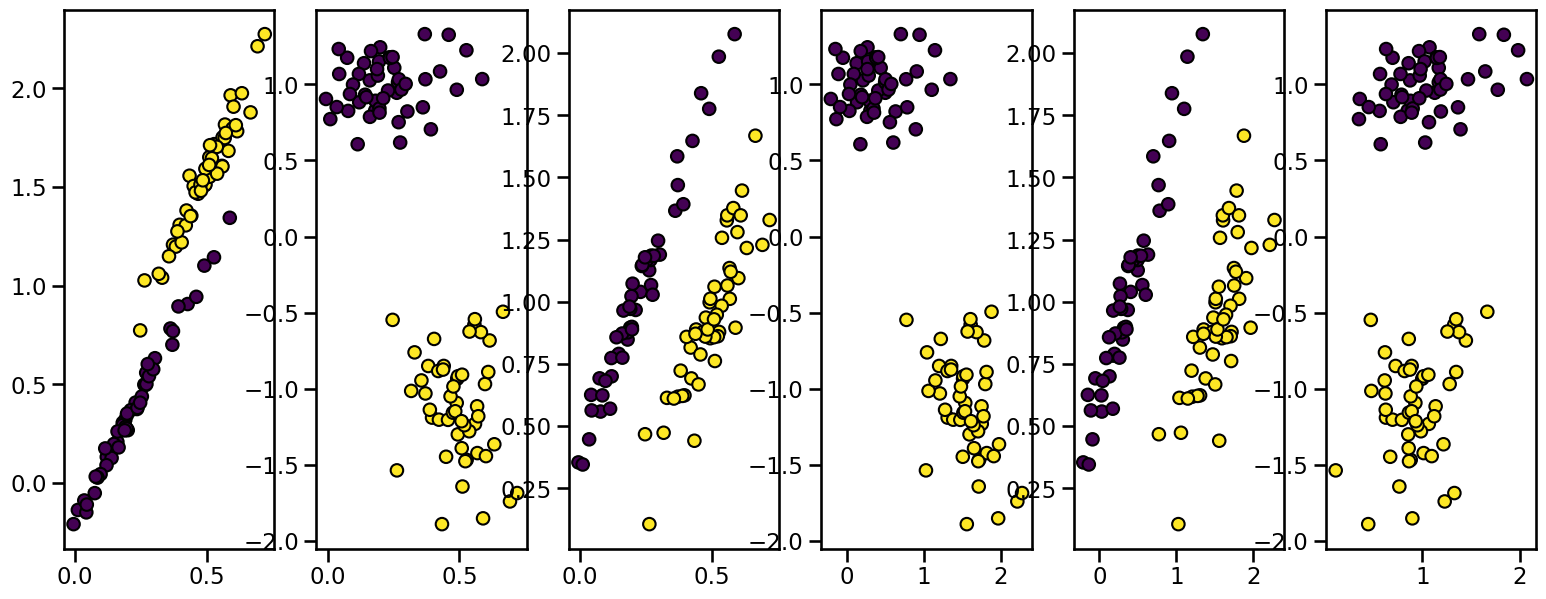

In [35]:
X0, y0 = make_classification(
    n_samples = 100,
    n_features=4, n_redundant=2, n_informative=2, random_state=1, n_clusters_per_class=1
)
# rng = np.random.default_rng()
# Z = rng.uniform()* rng.uniform(size=X0.shape) + X0

# Data = np.zeros( (len(X0), 6) )
# Data[:,:2] = Z.copy()
# Data[:,2:4] = rng.uniform() * rng.uniform(size=X0.shape) + X0
# Data[:,4:] = rng.uniform() * rng.uniform(size=X0.shape) + X0

fig, ax = plt.subplots(1, 6, figsize= (19, 7) )
ax[0].scatter(X0[:, 0], X0[:, 1], c=y0, cmap="viridis", edgecolors="k")
ax[1].scatter(X0[:, 0], X0[:, 2], c=y0, cmap="viridis", edgecolors="k")
ax[2].scatter(X0[:, 0], X0[:, 3], c=y0, cmap="viridis", edgecolors="k")
ax[3].scatter(X0[:, 1], X0[:, 2], c=y0, cmap="viridis", edgecolors="k")
ax[4].scatter(X0[:, 1], X0[:, 3], c=y0, cmap="viridis", edgecolors="k")
ax[5].scatter(X0[:, 3], X0[:, 2], c=y0, cmap="viridis", edgecolors="k")


[]

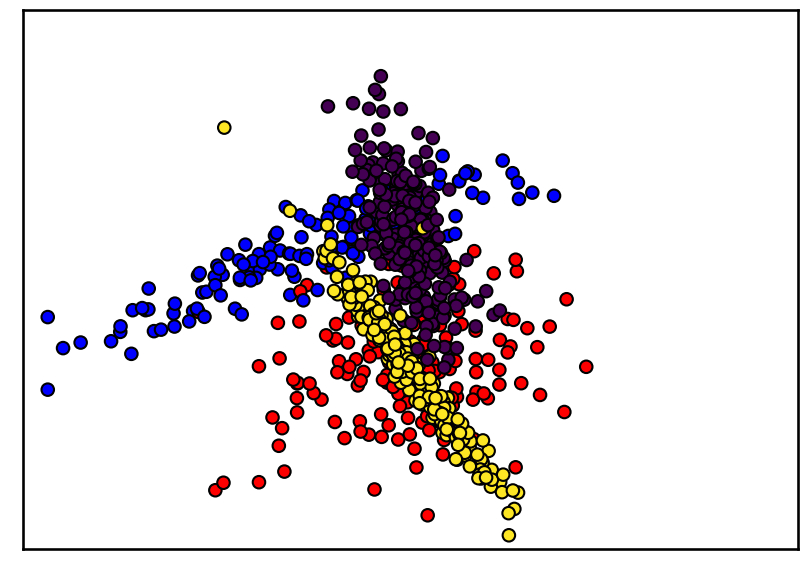

In [29]:
# preprocess dataset, split into training and test part
fig, ax = plt.subplots(1,1, figsize=(10,7) )

X = StandardScaler().fit_transform(Data)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y0, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])


# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(X0[:, 0], X0[:, 1], c=y0, cmap="viridis", edgecolors="k")
# Plot the testing points
# ax.scatter(
#     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
# )
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

---
<a id="part2"></a>
## Part 2. Logistic Regression (12 points)

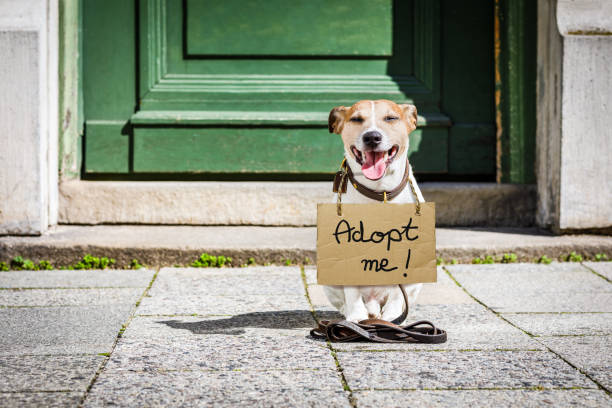

In this part of the homework, you will look at the various components that influence dog adoption in the US. You'll need to download two data files:
- dog_names.txt link
- dogs.csv link

The data is stored in the `.csv` file and descriptions are stored in the `.txt`. Using this data, we will seek to answer the question

##### What factors influence dog adoption in the US? #####

**&#9989; Question 2.1 (5 points):** Download both files and paste the commands you used into the following cell. Load the data in the `.csv` file into a `pandas` dataframe using the column names from the `dog_names.txt` file. Then display the first five rows of the data frame

The data is located at:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/dogs.csv`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/dog_names.txt`


In [4]:
# Put your code here


In [6]:
### ANSWER ###
# !curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/dogs.csv (1 point)
# !curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/dog_names.txt (1 point)

dogs = pd.read_csv('dogs.csv')  # (1 point)
dogs.columns = ["ID", 
                "Name",
                "contact_zip",
                "breed_primary",
                "breed_mixed", 
                "age", 
                "sex",
                "size",
                "fixed", "house_trained", "shots_current", "adopted"] # (1 point)
dogs.head() #(1 point)

,ID,Name,contact_zip,breed_primary,breed_mixed,age,sex,size,fixed,house_trained,shots_current,adopted
0,45286821,Gentry,42701,Dutch Shepherd,1,0,0,1,1,0,1,0
1,45868009,MIKE,95206,Pit Bull Terrier,1,1,0,1,1,0,0,0
2,45590634,TUX,20772,Chihuahua,1,3,0,0,0,0,0,0
3,44407023,Daisy (senior),49548,Dachshund,1,3,1,0,1,1,1,0
4,38672860,Bridget,27624,Siberian Husky,0,2,1,1,1,1,1,1


**&#9989; Question 2.2 (1 point):** Many of the variables are either discrete (numerical values standing in for categorical ones) or strings. 

**Do This:** Print the type of each column and then list which ones are strings. 

In [ ]:
# Put your code here


In [7]:
### ANSWER
dogs.dtypes
#Name and breed_primary are strings, ID is not a string but it's useless

ID                int64
Name             object
contact_zip       int64
breed_primary    object
breed_mixed       int64
age               int64
sex               int64
size              int64
fixed             int64
house_trained     int64
shots_current     int64
adopted           int64
dtype: object

**&#9989; Question 2.3 (4 points):** From the description file, there is a pretty clear variable that we can use as our class label to answer our overall question.

**Do This:** Create your `class_label` variable from the variable you identified. Create your `feature_vectors` variable by dropping the string columns identified above as well as `id` and your `class_label` variable.

In [ ]:
# Put your code here 


In [9]:
### ANSWER
# (1 point for dropping any column
# 1 point for dropping the correct columns
# 1 point for creating the class_label array
# 1 point for creating the correct class_label array
feature_vectors = dogs.drop(columns=['adopted', "ID","Name", "breed_primary"]) 
class_label = dogs['adopted']

**&#9989; Question 2.4 (3 points):** 

Explain below why we have to drop certain variables to form our `feature_vectors`

    
       ``` Put your answer here ```


###ANSWER

1 point for writing anything
2 point for giving a sensible explanation 

This is mostly to get a sense that they understand the process behind the feature_vectors. 

For the class label question: Our class_label is pretty obvious if they read both the intro and the description file. Steer them towards thinking about variables in context

For the above question: they should pick up on three main ideas:
- We cannot include strings as they are. We rely on numerical data to fit a model
- We cannot include ID because there will be perfect correlation OR just because ID is useless 
- We cannot include our class_label or we will have perfect separation

**&#9989; Question 2.5 (3 points):** 
Now that we have identified our labels and features, we would like to make a logistical model that will fit our data.

**Answer these questions**. Before creating the model we need to divide our data into a training and a testing data set. Why is that? What is the reason to why we need to split the data into a training and testing data set?

    
       ``` Put your answer here ```

###ANSWER

1 point for writing anything
2 point for giving a sensible explanation 


**&#9989; Question 2.5 (3 points):** Separate your dataset into a testing and training set. The training set should be of size of 75% of the original dataset. For replicable results, set the `random_state` argument to `1`, and print the size of each dataset.

In [11]:
# Put your code here

In [12]:
### ANSWER
# 1 point for using train_test_split
# 1 point for using the correct inputs (class_labels, feature_vectors, train_size, random_state)
# 1 point for printing the sizes.
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors,
    class_label, train_size=0.75, random_state = 1)

print(len(train_vectors))
print(len(test_vectors))

822
275


**&#9989; Question 2.6 (5 points):** 

- Create a logistic model using the `statmodels` `Logit` class. Don't forget to add the bias!
- Fit the logit model to your training set
- Display the model summary.

In [27]:
# Put your answer here


In [28]:
#### ANSWER
# 1 point for adding bias
# 1 point for creating logit
# 1 point for passing the correct inputs to logit
# 1 point for fitting
# 1 point for printing the summary

train_add = sm.add_constant(train_vectors)
test_add = sm.add_constant(test_vectors) #....why

model = sm.Logit(train_labels,train_add).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.323559
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                  822
Model:                          Logit   Df Residuals:                      817
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                 0.09622
Time:                        14:02:55   Log-Likelihood:                -265.97
converged:                       True   LL-Null:                       -294.28
Covariance Type:            nonrobust   LLR p-value:                 1.476e-11
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.9102      0.516     -9.510      0.000      -5.922      -3.898
breed_mixed       0.7815      0.300      2.608      0.009       0.194       1.369
age               0.7246      0.164      4.418      0.000       0.403       1.046
house_trained     0.6413      0.234      2.735      0.006       0.182       1.101
shots_current     0.8425      0.360      2.343      0.019       0.138       1.547
=================================================================================
"""

**&#9989; Question 2.6.1 (2 points):** Take a look at the summary table above and answer the following question:

1. What features are most informative ?

    ```Put your answer here```

### ANSWER
 1 point for writing anything, 1 points for the correct answer

**&#9989; Question 2.6.2 (5 points):** Let's look at the accuracy of our model. Do the following

- Use your model on your test dataset. Don't forget to add the bias here too!
- Use the `accuracy_score` function to see how good your model is.


<AxesSubplot:xlabel='contact_zip', ylabel='sex'>

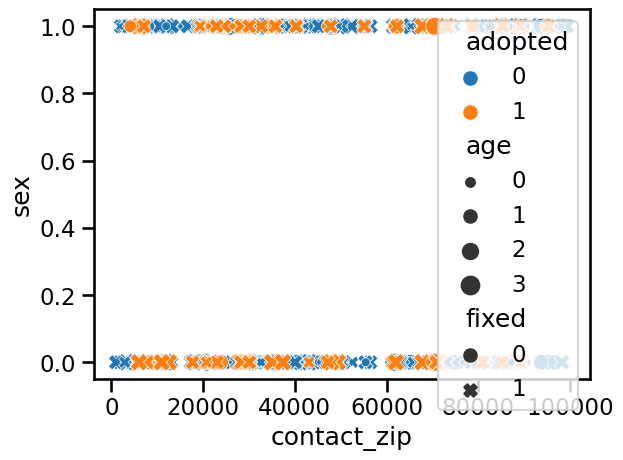

In [42]:
dogs.columns
# sns.scatterplot(x = "contact_zip", y = "age", hue = "adopted", data = dogs)
sns.scatterplot(x = "contact_zip", y = "sex", hue = "adopted", size = "age", style = "fixed", data = dogs)

In [40]:
dogs.columns

Index(['ID', 'Name', 'contact_zip', 'breed_primary', 'breed_mixed', 'age',
       'sex', 'size', 'fixed', 'house_trained', 'shots_current', 'adopted'],
      dtype='object')

In [29]:
#### ANSWER
# 2 points for using predict
# 1 point for using the correct inputs in predict
# 1 point for renormalizing the results to 0 or 1
# 1 point for using accyracy_score with correct inputs.

y_pred_score = model.predict(test_add)
y_predict = (y_pred_score>0.5).astype('int')

accuracy_score(test_labels,y_predict)

0.84

**Answer this:** Using a significance level of 0.05, determine which variables are significant in this model and list them below. What do each mean in the context of the problem?

Put youur answer here

###ANSWER: So this model isn't very good, we know this. Steer them towards using the P values for determining significance.
Significant variables:breed_mixed, house_trained, shots_current are all positive sdo they all positively contribute to adoption liklihood


#### Question --
Now  that we've determined our significant variables, repeat previous steps to create a reduced linear model with only the significant variables

In [12]:
# Put your answer here

In [16]:
#ANSWER
new_features = dogs.drop(["contact_zip", "sex", "size", "fixed", "ID", "breed_primary", "Name", "adopted"], axis =1)
train_vectors, test_vectors, train_labels, test_labels = train_test_split(new_features, class_label, train_size=0.75, random_state=5678)
train_add = sm.add_constant(train_vectors)
test_add = sm.add_constant(test_vectors)

model = sm.Logit(train_labels,train_add).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.323559
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                adopted   No. Observations:                  822
Model:                          Logit   Df Residuals:                      817
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                 0.09622
Time:                        14:01:17   Log-Likelihood:                -265.97
converged:                       True   LL-Null:                       -294.28
Covariance Type:            nonrobust   LLR p-value:                 1.476e-11
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.9102      0.516     -9.510      0.000      -5.922      -3.898
breed_mixed       0.7815      0.300      2.608      0.009       0.194       1.369
age               0.7246      0.164      4.418      0.000       0.403       1.046
house_trained     0.6413      0.234      2.735      0.006       0.182       1.101
shots_current     0.8425      0.360      2.343      0.019       0.138       1.547
=================================================================================
"""

**Answer This:** Has your model improved at all? Explain how you determined this.

In [17]:
#Answer goes here

In [18]:
###ANSWER
#They could do this or just read the RSquared, I'm *fine* with either
y_pred_score = model.predict(test_add)
y_predict = (y_pred_score>0.5).astype('int')

accuracy_score(test_labels,y_predict)

0.84

###ANSWER: of course the model hasn't improved, the dataset is awful lol. Since all variables contribute to correlation, we can expect the RSquared to drop just a tad with each variable lost (as insignificant as they are)

After we have constructed a model, sometimes want to see what type of errors it makes so that we can improve upon it.

**To Do This:** construct a confusion matrix using the `confusion_matrix` function from sklearn. What do you notice?

In [19]:
####ANSWER
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_predict)
cm

array([[231,   0],
       [ 44,   0]])

Answer goes here

###Answer: the confusion matrix is sketchy af. Students should notice that that there is a high number of false positves (dogs that are not adopted but the model thinks they are) but no false negatives or even true negatives. If they cannot get through this, this next question will throw them for a loop

Hmmmmmm...that confusion matrix looks......not great :(. Let's take a look at our class label to see if there is any skew in our class_label.

**Do This:** From your `class_label` variable, display the value count for true and false cases. What do you notice? How could this affect your model?

In [20]:
# Put your code here

Put your answer here

In [21]:
###ANSWER
#If they do a loop, good for them but I'm not doing all that
class_label.value_counts()

0    958
1    139
Name: adopted, dtype: int64

###Answer: This dataset is so skewed it could be used as ski ramp. (It was worse before but don't question that). We have a much greater number of unadopted dogs than adopted ones :( so it makes sense that our data is inaccurate and produced a greater number of falses

After you have conducted your analysis on the confusion matrix, do you think a perceptron model would perform better? Why?

In [22]:
#answer here

Let's validate your answer by building up a perceptron model, by either using the perceptron you have built in class or using the one from scikit learn. Train your model using the data set with the dropped features.

In [23]:
#Answer
p = Perceptron()
p.fit(train_vectors, train_labels)
y_pred = p.predict(test_vectors)
print(accuracy_score(test_labels, y_pred))
print(confusion_matrix(test_labels, y_pred))

0.84
[[231   0]
 [ 44   0]]


Does your previous answer fit with what your perceptron model tells you?

In [24]:
#answer here

&#9989; **Question 2.1.5 (1 point):** Now that we have identified our labels and features, we would like to make a logistical model that will fit our data. 

**Remember**, we will need to first create a training and testing data set before we will make our model. Why is that? What is the reason to why we need to split the data into a training and testing data set?

In [25]:
# Put your code here


<font size=+3>&#9998;</font> Erase this and put your answer here.

In [26]:
### ANSWER
labels.value_counts()

### Balanced

NameError: name 'labels' is not defined

---
## Part 3. Perceptron (5 points)

For this part, you will use another model, Perceptron, to continue working on the same classification problem.

**&#9989; Question 3.1 (2 points):** (1) Build a Perceptron model with default settings, and fit the model based on the training set.

(2) Apply the trained model on the test features to predict the labels for the testing dataset. 

(3) Evaluate the model by printing out the confusion matrix and classification report, based on its performance on the testing dataset.

**Note:** You can use the built-in model `Perceptron` in `sklearn`.

In [ ]:
# Put your code here


In [12]:
### ANSWER ###

myperceptron = Perceptron()
myperceptron.fit(x_train, y_train)

y_predict = myperceptron.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 90   4]
 [104   1]]
              precision    recall  f1-score   support

           0       0.46      0.96      0.63        94
           1       0.20      0.01      0.02       105

    accuracy                           0.46       199
   macro avg       0.33      0.48      0.32       199
weighted avg       0.32      0.46      0.30       199



**&#9989; Question 3.2 (3 points):**. Finding the best penalty term.

`Perceptron` from the `sklearn` can employ different penalty terms, including `l1`, `l2`, and `elasticnet` (Note: check the `penalty` argument of `Perceptron`). Apply the Perceptron on the training dataset again, based on different penalty terms (i.e. make 3 Perceptron models). Print out the accuray score of each model, based on the testing dataset. 

Which penalty term results in the best accuracy?

In [ ]:
# Put your code here


In [13]:
### ANSWER ###
for pnty in ['l2','l1','elasticnet']:
    myperceptron = Perceptron(penalty=pnty)
    myperceptron.fit(x_train, y_train)
    print(myperceptron.score(x_test,y_test))
# L1 is best

0.4723618090452261
0.5527638190954773
0.4723618090452261


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Principal Component Analysis (6 points)

The full model uses all 10 features to predict the results. In many cases, we might need to see how close we can get with fewer features. But instead of simply removing features, we will use a Principal Component Analysis (PCA) to determine the combined features that contribute the most the model (through their accounted variance).

**&#9989; Question 4.1 (1 point):** Do a little bit of data preparation before we perform our PCA.

Because the features in our dataset have very different ranges of values, the variation captured by the PCA will be skewed by these relative differences. As a result, it is good practice to **normalize** the features so that they have comparable ranges of values. Thankfully, `sklearn` has a useful function for doing this!

```from sklearn.preprocessing import MinMaxScaler```

Perform a "Min-Max" scaling to normalize the features and store the new normalized features in a new dataframe called as `features_norm`.

In [ ]:
# Put your code here
from sklearn.preprocessing import MinMaxScaler


In [14]:
### ANSWER ###
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(features), columns=features.columns, index=features.index)
features_norm

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.000012,0.292383,0.538579,0.504567,0.279789,0.373396,0.084569,0.525016,0.666995,0.682334
3,0.051232,0.000000,0.099869,0.000000,0.147469,0.219089,0.081816,0.028220,0.136492,0.377400
4,0.102204,0.169363,0.303786,0.433864,0.222054,0.399405,0.141857,0.261885,0.538552,0.318372
6,0.030227,0.158317,0.009161,0.153590,0.103743,0.191606,0.210754,0.247571,0.367096,0.397211
8,0.091911,0.340339,0.220272,0.322154,0.145596,0.502093,0.161927,0.537776,0.456159,0.446565
...,...,...,...,...,...,...,...,...,...,...
995,0.114248,0.133951,0.000000,0.530525,0.000000,0.373067,0.237464,0.333451,0.600994,0.475890
996,0.000346,0.095651,0.000000,0.451721,0.055580,0.333762,0.170409,0.333701,0.538244,0.611120
997,0.027365,0.632170,0.281552,0.187701,0.503873,0.575510,0.205672,0.661026,0.442777,0.629475
998,0.000000,0.447522,0.000000,0.332856,0.112837,0.585003,0.163290,0.649628,0.408276,0.555850


**&#9989; Question 4.2 (1 point):** As you did in Question 2.2.1 above, split your new normalized features and corresponding labels (the labels are the same as before) into a training and a testing set, with the training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. Print the lengths to show you have the right number of entries.

In [ ]:
# Put your code here


In [15]:
### ANSWER
x_train, x_test, y_train, y_test = train_test_split(features_norm, labels, train_size=0.75, random_state=314159)
print(len(x_train))
print(len(x_test))

594
199


**&#9989; Question 4.3 (3 points):** Run a Principle Component Analysis (PCA)

Since we only have 10 features to start with, let's see how well we can do if we try to aggressively reduce the feature count and use only **3** principle components. We'll see how well we can predict the labels of dataset with just three!


(1) Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using only 3 components. 

(2) Transform both the test and training features using the result of your PCA. 

(3) Print the `explained_variance_ratio_`.

In [ ]:
# Put your code here


In [16]:
### ANSWER ###

n_components = 3
pca = PCA(n_components=n_components)
_ = pca.fit(x_train)

pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

print('Total explained variance: ', pca.explained_variance_ratio_)

Total explained variance:  [0.29811269 0.24310656 0.17698509]


&#9989; **Question 4.4 (1 point):** What is the total explained variance ratio captured by the 3 principle components? (just quote the number) How well do you think a model with these many features will perform? Why?

<font size=+3>&#9998;</font> Erase this and put your answer here.

###ANSWER

These 3 components account for roughly 72% of all variance. I expect the classifier should work fairly well with just 3 components because we've captured a large fraction of the variance, but it won't be able to do a perfect job because it doesn't have the remaining 28%.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## 5. Support vector machine based on PCA (14 points)

### 5.1 Support vector machine (6 points)

For this part, you will build SVC model using the 3 components from PCA, and do grid search to find the best hyperparameters.

**&#9989; Question 5.1.1 (2 points):** Build a linear SVC model with `C=0.1`, and fit it to the training set (using the 3 PCA components from the training set).

Then use the test features to predict the labels for the testing set. 

Evaluate the model's performance using the **confusion matrix** and **classification report**.

In [ ]:
# Put your code here


In [17]:
### ANSWER ###

svc = SVC(kernel='linear', C=0.1)
svc.fit(pca_x_train, y_train)

y_predict = svc.predict(pca_x_test)

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[69 25]
 [50 55]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        94
           1       0.69      0.52      0.59       105

    accuracy                           0.62       199
   macro avg       0.63      0.63      0.62       199
weighted avg       0.64      0.62      0.62       199



**&#9989; Question 5.1.2 (3 points):** Find the best hyperparameters

At this point, we have fit one SVC model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions.

Using the following parameters (`C` = `1e-3`, `0.01`, `0.1`, `1`, `10`, `100` and `gamma` = `1e-6`, `1e-5`, `1e-4`, `1e-3`, `0.01`, `0.1`) for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you've run the grid search, print the "best estimators".

In [ ]:
# Put your code here


In [18]:
### ANSWER

parameters = {'kernel':('linear','rbf'), 'C':[1e-3, 0.01, 0.1, 1, 10, 100], 'gamma':[1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(pca_x_train, y_train)
clf.best_estimator_

SVC(C=100, gamma=1e-06, kernel='linear')

&#9989; **Question 5.1.3 (1 point):**  Evaluate the best fit model

Now that we have found the "best estimators", let's determine how good the fit is.

Use the test features to predict the labels, based on the best model. Evaluate the performance using the **confusion matrix** and **classification report**.

In [ ]:
# Put your code here


In [19]:
### ANSWER
y_predict = clf.predict(pca_x_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[63 31]
 [49 56]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        94
           1       0.64      0.53      0.58       105

    accuracy                           0.60       199
   macro avg       0.60      0.60      0.60       199
weighted avg       0.61      0.60      0.60       199



### 5.2 How well does PCA work? (8 points)
The number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a simple dataset, **this can be very useful for more complex datasets and models!**

**&#9989; Question 5.2.1 (3 points):**

To systematically explore how well PCA improves our classification model, we will do this by writing a function that 
* creates the PCA
* creates the SVC model
* uses `GridSearchCV` to find the best hyperparameters
* predicts the labels using test data
* returns the accuracy scores and the explained variance ratio.

Just as you did in Question 5.1.2, use the following parameters (`C` = `1e-3`, `0.01`, `0.1`, `1`, `10`, `100` and `gamma` = `1e-6`, `1e-5`, `1e-4`, `1e-3`, `0.01`, `0.1`) for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters.

So, Your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

In [ ]:
# Put your code here

def reduced_SVM(n_components, train_features, train_labels, test_features, test_labels):
    

In [20]:
### ANSWER ###

def reduced_SVM(n_components, train_features, train_labels, test_features, test_labels):
    
    pca = PCA(n_components=n_components)
    pca.fit(train_features)
    
    pca_train_features = pca.transform(train_features)
    pca_test_features = pca.transform(test_features)
    
    parameters = {'kernel':('linear','rbf'), 'C':[1e-3, 0.01, 0.1, 1, 10, 100], 'gamma':[1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1]}
    svc = SVC()
    clf = GridSearchCV(svc, parameters, cv = 5, n_jobs=-1)
    clf.fit(pca_train_features, y_train)
    print(clf.best_estimator_)

    predict_labels = clf.predict(pca_test_features)
    
    return accuracy_score(test_labels, predict_labels), sum(pca.explained_variance_ratio_)

**&#9989; Question 5.2.2 (2 points):**

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

For 1 through 10 components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

In [ ]:
# Put your code here


In [21]:
### ANSWER ###

a = []
v = []
components = np.arange(1,11,1)

for component in components:
    
    a_temp, v_temp = reduced_SVM(component, x_train, y_train, x_test, y_test)
    a.append(a_temp)
    v.append(v_temp)
    print('Finished SVM with ', component, 'components.')

SVC(C=100, gamma=0.01)
Finished SVM with  1 components.
SVC(C=1, gamma=1e-06, kernel='linear')
Finished SVM with  2 components.
SVC(C=100, gamma=1e-06, kernel='linear')
Finished SVM with  3 components.
SVC(C=10, gamma=0.01)
Finished SVM with  4 components.
SVC(C=10, gamma=0.1)
Finished SVM with  5 components.
SVC(C=1, gamma=1e-06, kernel='linear')
Finished SVM with  6 components.
SVC(C=1, gamma=1e-06, kernel='linear')
Finished SVM with  7 components.
SVC(C=1, gamma=1e-06, kernel='linear')
Finished SVM with  8 components.
SVC(C=1, gamma=1e-06, kernel='linear')
Finished SVM with  9 components.
SVC(C=10, gamma=0.1)
Finished SVM with  10 components.


**&#9989; Question 5.2.3 (1 point):** Plot the accuracy vs # of components.

In [ ]:
# Put your code here


Text(0, 0.5, 'Accuracy')

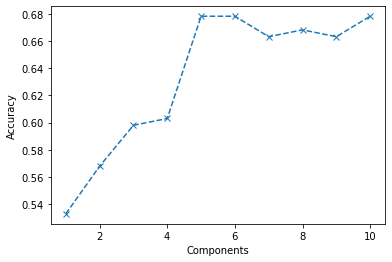

In [22]:
### ANSWER ###

plt.plot(components,a, 'x--')
plt.xlabel('Components')
plt.ylabel('Accuracy')


**&#9989; Question 5.2.4 (1 point):** Where does it seem like we have diminishing returns? That is, at what point is there no major increase in accuracy (or perhaps the accuracy is decreased) as we add additional components to the PCA?

<font size=+3>&#9998;</font> Erase this and put your answer here.

###ANSWER 

Once we add the 5th princple component we get high accuracy and nothing is gained by adding other components.

**&#9989; Task 5.2.5 (1 point):** Plot the total explained variance ratio vs # of components. 

In [ ]:
# Put your code here


Text(0, 0.5, 'Explained Variance')

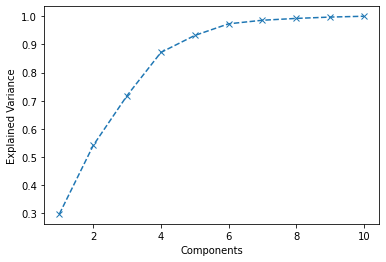

In [23]:
### ANSWER ###

plt.plot(components,v, 'x--')
plt.xlabel('Components')
plt.ylabel('Explained Variance')

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofa-byNJHa0xBs0jOGcRl02lURU83U0ZHUUpWUUFRUzhCQ0JZWDQxVVRUVi4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework #5, and upload your notebook.